In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

        TV - Spend on TV Advertisements
        Radio - Spend on radio Advertisements
        Newspaper - Spend on newspaper Advertisements
        Sales - Sales revenue generated
        
What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [39]:
url = 'C://Users//t.shah//Desktop//TanujGit//MachineLearning//LinearRegression//Data//Advertising.csv'

data = pd.read_csv(url, index_col=0)
data.head()

,TV,radio,newspaper,sales
sno,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
data.shape

(200, 4)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [10]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Distribution of Features**

Distribution on independent varaibles.<br>
# Assumptions- I #
### There a relationship between sales and ( newspaper, radio, and TV) channels? There Should be liner relationship between dependent variable and independent variable

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


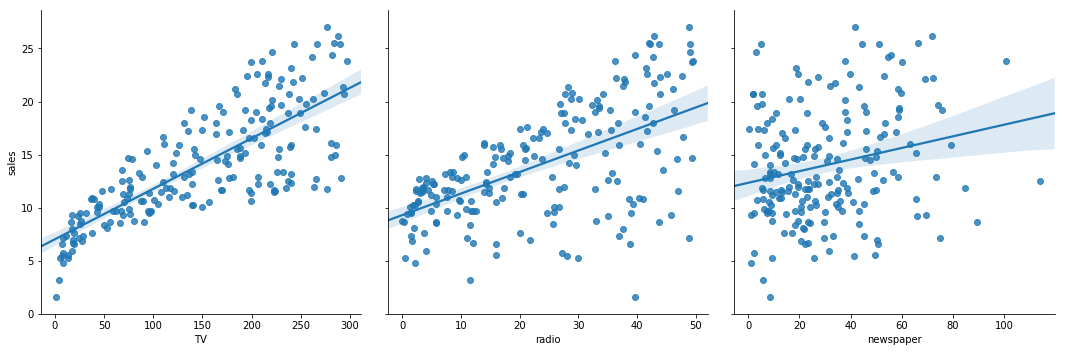

In [25]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, aspect=1, kind='reg')

# Assumptions- II Target varaibles should be normally distributed 

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


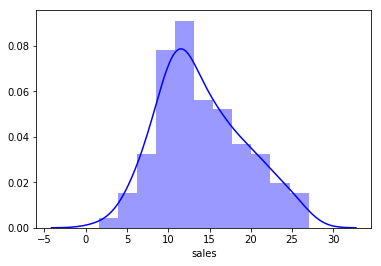

In [11]:
sns.distplot(data.sales, color="b")

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


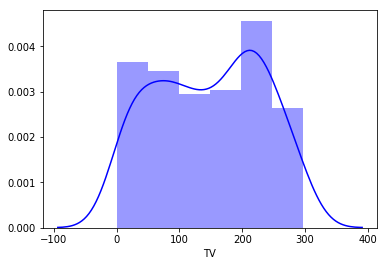

In [13]:
sns.distplot(data.TV, color="b")

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


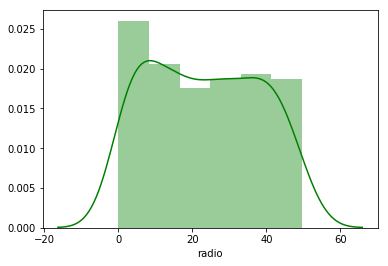

In [14]:
sns.distplot(data.radio, color="g")

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


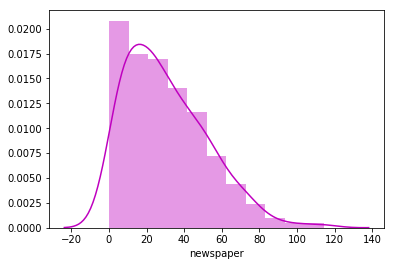

In [15]:
sns.distplot(data.newspaper, color="m")

**Observation** 

        Sales seems to be normal distribution. 
        Spending on newspaper advertisement seems to be right skewed. Most of the spends on newspaper is fairly low.
        Spend on radio and tv seems be uniform distribution. 
        Spends on tv are comparatively higher then spend on radio and newspaper.

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


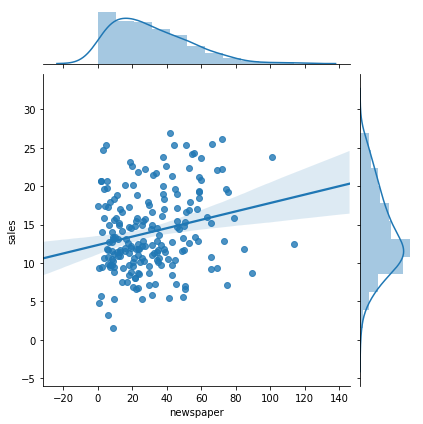

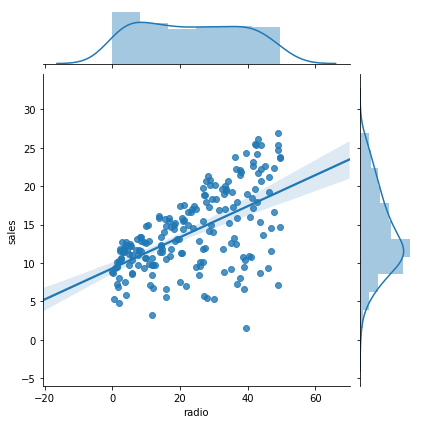

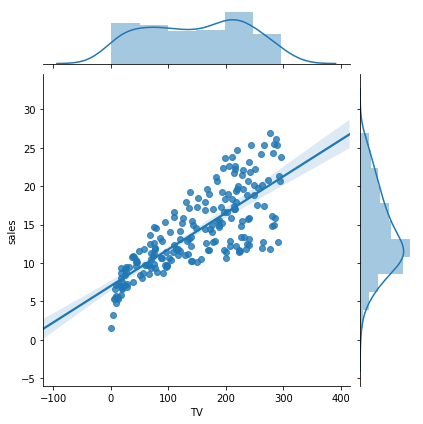

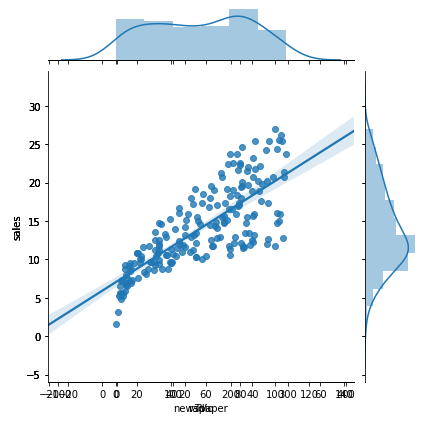

In [23]:
new_sales_joint = sns.jointplot("newspaper", "sales", data=data, kind='reg')
radio_sales_joint = sns.jointplot("radio", "sales", data=data, kind='reg')
tv_sales_joint = sns.jointplot("TV", "sales", data=data, kind='reg')

f = plt.figure()
for J in [new_sales_joint, radio_sales_joint, tv_sales_joint]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

# Assumptions- III Independent varaibles should not be correlated ( No Multicollinearity)

If I have more than indepdent variable they should not correlated among them self. There should not releation ship between indepdent variable. If there is we will not find a effort one variable to other depdent variable.

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


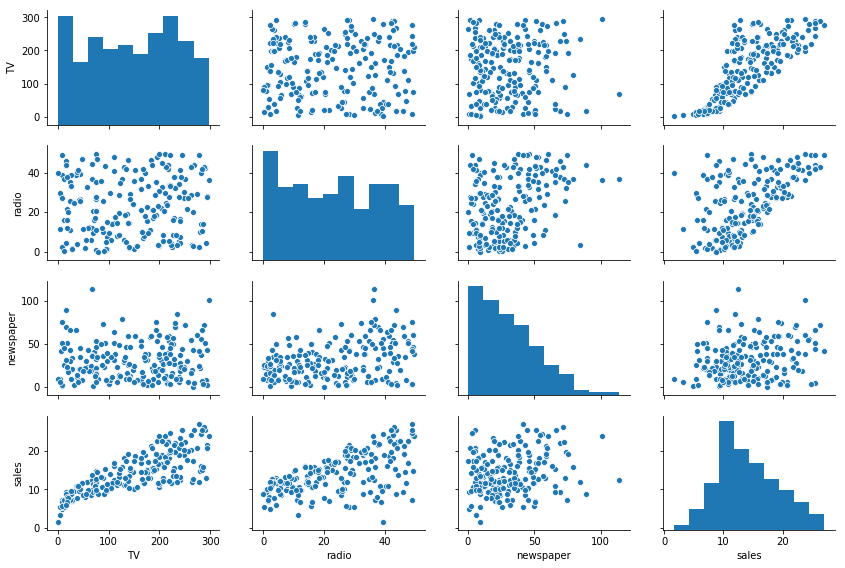

In [24]:
sns.pairplot(data, size = 2, aspect = 1.5)

__Calculating and plotting heatmap correlation__

In [27]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


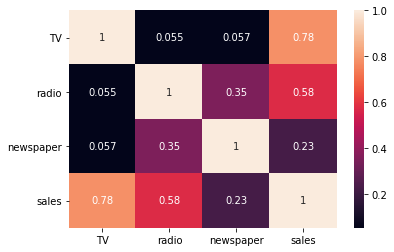

In [29]:
sns.heatmap(data.corr(), annot= True)

### Assumptions of Linear Regression

1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.

## Preparing X and y using pandas
__Standardization.__
Standardize features by removing the mean and scaling to unit standard deviation.

In [37]:
# Examples

from sklearn.preprocessing import StandardScaler
import numpy as np

# 4 samples/observations and 2 variables/features
data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print(data)


print()

print(scaled_data)

'''The main idea is to normalize/standardize (mean = 0 and standard deviation = 1)
your features before applying machine learning techniques. 
StandardScaler() will normalize the features (each column of X, INDIVIDUALLY !!!) so that each column/feature/variable
will have mean = 0 and standard deviation = 1.'''



[[0 0]
 [1 0]
 [0 1]
 [1 1]]

[[-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]]


C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


'The main idea is to normalize/standardize (mean = 0 and standard deviation = 1)\nyour features before applying machine learning techniques. \nStandardScaler() will normalize the features (each column of X, INDIVIDUALLY !!!) so that each column/feature/variable\nwill have mean = 0 and standard deviation = 1.'

In [36]:
# Verify that the mean of each feature (column) is 0:
scaled_data.mean(axis = 0)

array([0., 0.])

In [38]:
scaled_data.std(axis = 0)

array([1., 1.])

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data)
data = pd.DataFrame(data1)
data.head()

,0,1,2,3
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [41]:
data.columns = ['TV','radio','newspaper','sales']
data.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [88]:
feature_cols = ['TV', 'radio', 'newspaper']                # create a Python list of feature names
X = data[feature_cols] # # use the list to select a subset of the original DataFrame-+
print(type(X))
print(X.shape)
y = data.sales
y.head()


<class 'pandas.core.frame.DataFrame'>
(200, 3)


0    1.552053
1   -0.696046
2   -0.907406
3    0.860330
4   -0.215683
Name: sales, dtype: float64

In [47]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


### Splitting X and y into training and test datasets.


In [50]:
from sklearn.cross_validation import train_test_split

def split(X, y ) :
    return train_test_split(X, y , test_size =0.20 , random_state = 1)

X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (160, 3)
y_train shape:  (160,)

Test cases as below
X_test shape:  (40, 3)
y_test shape:  (40,)


__Apply any machine learning algorithm on your dataset, basically there are 4 steps:__
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error 
The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

In [110]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [111]:
X = data[feature_cols]  
y = data.sales
linreg = linear_reg(X,y)

In [82]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 0.001162087460638478
Coefficients: [0.77081214 0.50806629 0.01079522]


__Its hard to remember the order of the feature names, we so we are zipping the features to pair the feature names with the coefficients__

In [89]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()   
coef.insert(0, linreg.intercept_)
print(coef)
print(feature_cols)

[0.001162087460638478, 0.77081213791251, 0.50806629027561, 0.010795215187608894]
['Intercept', 'TV', 'radio', 'newspaper']


In [90]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 0.001162087460638478
TV 0.77081213791251
radio 0.50806629027561
newspaper 0.010795215187608894


__y = 0.00116 + 0.7708 `*` TV + 0.508 `*` radio + 0.010 `*` newspaper__

How do we interpret the TV coefficient (_0.77081_)
- A "unit" increase in TV ad spending is **associated with** a _"0.7708_ unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 770.8 widgets.

Important Notes:
- This is a statement of __association__, not __causation__.
- If an increase in TV ad spending was associated with a __decrease__ in sales,  β1  would be __negative.__


__Using the Model for Prediction__

In [93]:
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test)     # make predictions on the testing set
# We need an evaluation metric in order to compare our predictions with the actual values.

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [102]:
from sklearn import metrics
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.2553322418777194
MAE for test set is 0.1998724319969636


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [103]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.1113807557032536
MSE for test set is 0.07353999839228291


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [104]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.3337375551286573
RMSE for test set is 0.2711825923474494


# Model Evaluation using Rsquared value.
- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [105]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8959372632325174 0.8939360567562197


In [106]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8927605914615386 0.8838239740833336


## Feature Selection

At times some features do not contribute much to the accuracy of the model, in that case its better to discard those features.<br/> 
- Let's check whether __"newspaper"__ improve the quality of our predictions or not.<br/> 
To check this we are going to take all the features other than "newspaper" and see if the error (RMSE) is reducing or not.
- Also Applying __Gridsearch__ method for exhaustive search over specified parameter values of  estimator.

In [112]:
feature_cols = ['TV','radio']                                                          # create a Python list of feature names
X = data[feature_cols]  
y = data.sales
linreg=linear_reg(X,y,'True')

Mean cross-validated score of the best_estimator :  0.885792093530779
RMSE for the test set is 0.07218638347382718


- _Before_ doing feature selection _RMSE_ for the test dataset was __0.271__.<br/>
- _After_ discarding 'newspaper' column, RMSE comes to be __0.072__.<br/>
As you can see there is __significant improvement__ in the quality, therefore, the 'newspaper' column should be discarded. But if in some other case if there is no significant decrease in the RMSE, then you must keep that feature.


# Handling Categorical Features
Let's create a new feature called Area, and randomly assign observations to be rural, suburban, or urban :

In [114]:
np.random.seed(123456)                                                # set a seed for reproducibility
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)                         # assign roughly one third of observations to each group
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,radio,newspaper,sales,Area
0,0.969852,0.981522,1.778945,1.552053,rural
1,-1.197376,1.082808,0.669579,-0.696046,urban
2,-1.516155,1.528463,1.783549,-0.907406,rural
3,0.052050,1.217855,1.286405,0.860330,urban
4,0.394182,-0.841614,1.281802,-0.215683,suburban


We want to represent Area numerically, but we can't simply code it as:<br/>
- 0 = rural,<br/>
- 1 = suburban,<br/>
- 2 = urban<br/>
Because that would imply an **ordered relationship** between suburban and urban, and thus urban is somehow "twice" the suburban category.<br/> Note that if you do have ordered categories (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can use a single dummy variable to represent the categories numerically (such as 1, 2, 3, 4, 5).<br/>

Anyway, our Area feature is unordered, so we have to create **additional dummy variables**. Let's explore how to do this using pandas:

In [115]:
area_dummies = pd.get_dummies(data.Area, prefix='Area')                           # create three dummy variables using get_dummies
area_dummies.head()

,Area_rural,Area_suburban,Area_urban
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


Here is how we interpret the coding:
- **rural** is coded as  Area_suburban = 0  and  Area_urban = 0
- **suburban** is coded as  Area_suburban = 1  and  Area_urban = 0
- **urban** is coded as  Area_suburban = 0  and  Area_urban = 1

If this sounds confusing, think in general terms that why we need only __k-1 dummy variables__ if we have a categorical feature with __k "levels"__.

Anyway, let's add these two new dummy variables onto the original DataFrame, and then include them in the linear regression model.

In [116]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,Area,Area_rural,Area_suburban,Area_urban
0,0.969852,0.981522,1.778945,1.552053,rural,1,0,0
1,-1.197376,1.082808,0.669579,-0.696046,urban,0,0,1
2,-1.516155,1.528463,1.783549,-0.907406,rural,1,0,0
3,0.052050,1.217855,1.286405,0.860330,urban,0,0,1
4,0.394182,-0.841614,1.281802,-0.215683,suburban,0,1,0


In [120]:
feature_cols = ['TV', 'radio', 'newspaper', 'Area_suburban', 'Area_urban']             # create a Python list of feature names
X = data[feature_cols]  
y = data.sales
linreg = linear_reg(X,y)

In [121]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.0021853599197542775
TV 0.7691747677616427
radio 0.505968101539116
newspaper 0.01109735332606361
Area_suburban -0.03117228423836125
Area_urban 0.04181960230726815


__y = - 0.00218 + 0.7691 `*` TV + 0.505 `*` radio + 0.011 `*` newspaper - 0.0311 `*` Area_suburban + 0.0418 `*` Area_urban__<br/>
How do we interpret the coefficients?<br/>
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 0.0311 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 0.0418 widgets (as compared to rural).